In [37]:
from scipy.stats import (
    norm, binom, expon
)
import numpy as np
from seaborn import distplot
from matplotlib import pyplot as plt
import seaborn
from tqdm import tqdm

In [2]:

def inverse_plot_colorscheme():
    import cycler
    def invert(color_to_convert): 
        table = str.maketrans('0123456789abcdef', 'fedcba9876543210')
        return '#' + color_to_convert[1:].lower().translate(table).upper()
    update_dict = {}
    for key, value in plt.rcParams.items():
        if value == 'black':
            update_dict[key] = 'white'
        elif value == 'white':
            update_dict[key] = 'black'
    
    old_cycle = plt.rcParams['axes.prop_cycle']
    new_cycle = []
    for value in old_cycle:
        new_cycle.append({
            'color': invert(value['color'])
        })
    plt.rcParams.update(update_dict)
    plt.rcParams['axes.prop_cycle'] = cycler.Cycler(new_cycle)
    lec = plt.rcParams['legend.edgecolor']
    lec = str(1 - float(lec))
    plt.rcParams['legend.edgecolor'] = lec

In [3]:
inverse_plot_colorscheme()

Про нормальное распределение в python:

Создать св с нормальным распределением - scipy.stats.norm(loc, scale), где loc = матож, scale = корень из дисперсии    
метод cdf(x) - фр в точке x    
метод ppf(q) - q-квантиль    
метод pdf(x) - плотность в точке x   

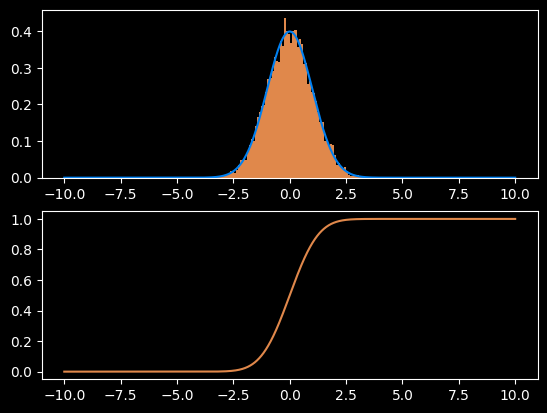

In [11]:
stand_norm = norm(loc=0, scale=1)

x = np.linspace(-10, 10, 10_000)
sample = stand_norm.rvs(10_000)

pdf = stand_norm.pdf(x)
cdf = stand_norm.cdf(x)

fig, ax = plt.subplots(2)

ax[0].hist(sample, bins=100,  density=True)
ax[0].plot(x, pdf)

ax[1].plot(x, cdf)

Напомним ЦПТ

Пусть $\xi_1, ..., \xi_n$ &mdash; **независимо** одинаково распределенные случайные величины, у которых сущестуют мат. ожидание и дисперсия: $E [\xi_i] = \mu < \infty$ и $Var[\xi_i] = \sigma^2 < \infty$. тогда $\sqrt{n}\dfrac{\overline \xi - \mu}{\sqrt{\sigma^2}}$ сходится по распределению к $\mathcal{N}(0, 1)$.

In [42]:
def gen_sample(sample_size, rand_val):
    sample = rand_val.rvs(sample_size)

    true_mean = rand_val.mean()
    true_var = rand_val.var()
    sample_mean = sample.mean()
    return np.sqrt(sample_size) * (sample_mean - true_mean) / np.sqrt(true_var)

In [45]:
def check_CLT(sample_size, rand_val, each_sample_size = 1_000):
    selection = np.empty(sample_size)
    for i in tqdm(range(sample_size)):
        selection[i] = gen_sample(each_sample_size, rand_val)

    plt.hist(selection, density=True, bins=100)

    x = np.linspace(-5, 5, 10_000)
    plt.plot(x, stand_norm.pdf(x))

100%|██████████| 10000/10000 [00:03<00:00, 3033.76it/s]


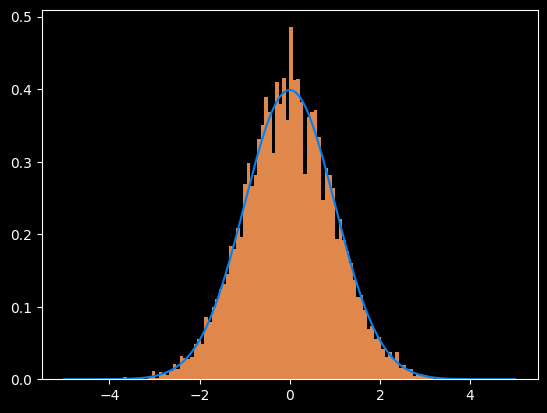

In [46]:
check_CLT(10_000, binom(n=30, p=0.5))

100%|██████████| 10000/10000 [00:02<00:00, 3344.67it/s]


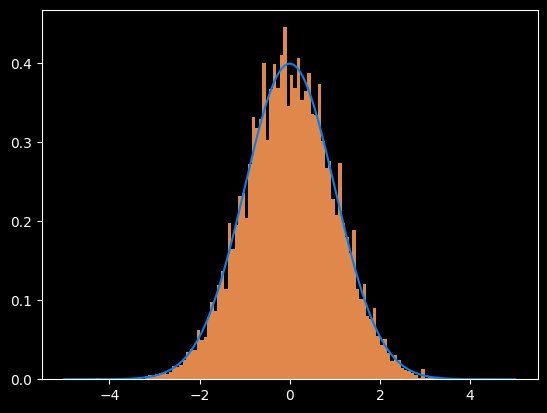

In [48]:
check_CLT(10_000, binom(n=30, p=0.8))

100%|██████████| 1000/1000 [00:00<00:00, 2889.26it/s]


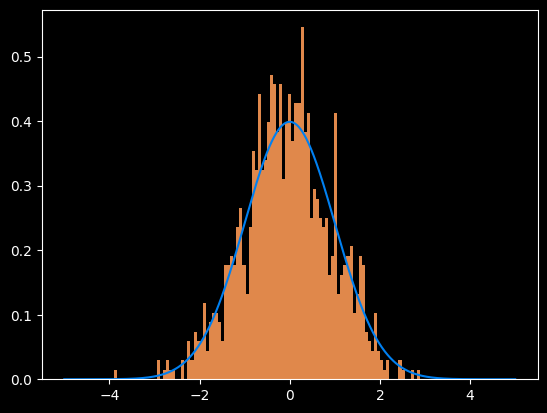

In [49]:
check_CLT(1_000, binom(n=30, p=0.8))

100%|██████████| 100/100 [00:00<00:00, 2135.57it/s]


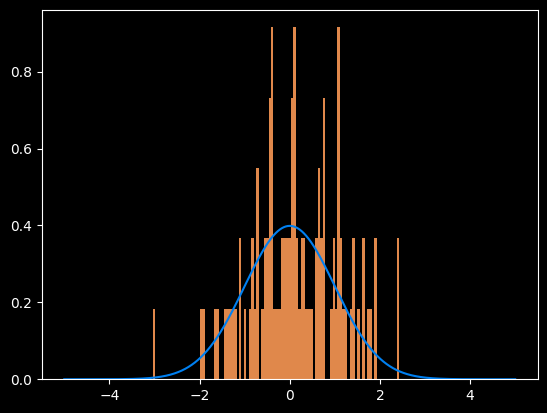

In [52]:
check_CLT(100, binom(n=30, p=0.5))

100%|██████████| 30/30 [00:00<00:00, 2313.80it/s]


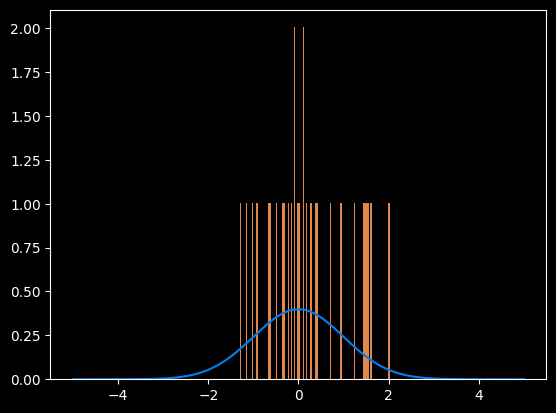

In [53]:
check_CLT(30, binom(n=30, p=0.5))

100%|██████████| 10000/10000 [00:02<00:00, 4422.31it/s]


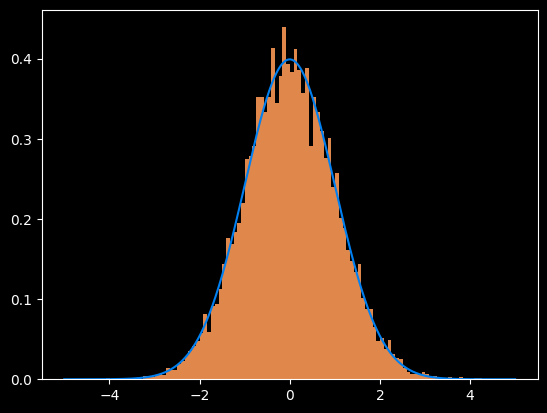

In [54]:
check_CLT(10_000, expon(scale=4))

100%|██████████| 1000/1000 [00:00<00:00, 3602.82it/s]


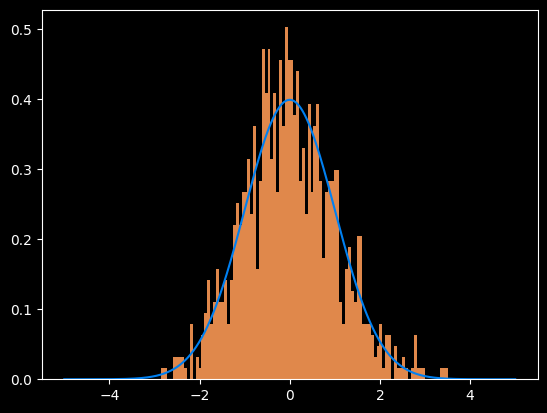

In [55]:
check_CLT(1_000, expon(scale=4))

100%|██████████| 100/100 [00:00<00:00, 4177.93it/s]


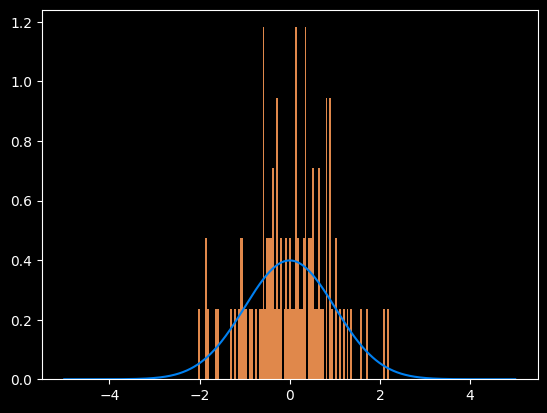

In [56]:
check_CLT(100, expon(scale=4))

100%|██████████| 50/50 [00:00<00:00, 5011.24it/s]


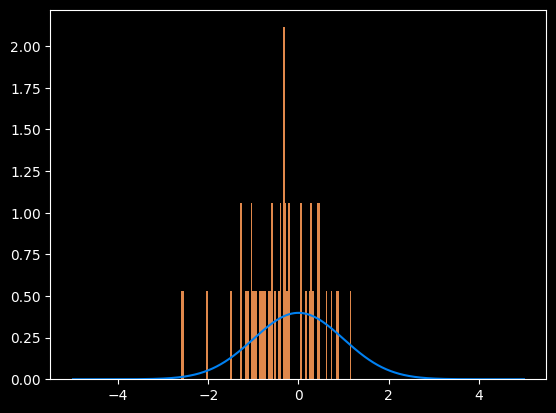

In [57]:
check_CLT(50, expon(scale=4))

Теперь вспомним задачу из прошлых глав

> 📈 **Задача**
>
> Вы придумали идею для стартапа, где курьеры собирают заказы для клиентов и отвозят им на дом. Стоимость заказа в вашем стартапе &mdash; 10К ₽, а стоимость работы курьера &mdash; 5К ₽.
Специфика вашего стартапа такова, что есть большой риск возврата без оплаты. С учетом стоимостей, инвесторы готовы проспонсировать вам инфраструктуру и привлечение клиентов, если вы покажете, что шанс оплаты заказа больше 50%.
Вы своими силами обработали 30 заказов, 19 из них были успешно оплачены. Достаточно ли этих данных, чтобы убедить инвесторов?


У нас есть выборка $X_1,\ X_2,\ ...,\ X_n,\ X_i \sim \text{Bernoulli}(\mu)$

$H_0: \mu =\mu_0 = 0.5\ vs.\ H_1: \mu > 0.5$


**Как мы решали задачу ранее**

- $T(X^n) = \underset{i=1}{\overset{n}{\sum}} X_i,\ T \overset{H_0}{\sim} \text{Binom} (n, \mu_0)$
- Пусть реализация $T(X^n) = t$. Тогда 
- $\text{p-value} = P_{H_0}(T(X^n) \geq t) = 1 - P_{H_0}(T(X^n) < t)$
- Или, если переписать на языке Python `p-value = 1 - binom.cdf(t - 1, n, mu0)`

In [59]:
def get_pval_old_way(n, mu0, q):
    return 1 - binom(n=n, p=mu0).cdf(q - 1)

In [60]:
n = 30
mu0 = 0.5
q = 19

old_pval = get_pval_old_way(n, mu0, q)
old_pval

np.float64(0.10024421103298664)

А теперь посмотрим, что нам говорит ЦПТ.
- При достаточно большом размере выборки $\underset{i=1}{\overset{n}{\sum}} X_i \sim \mathcal{N}\left(n \cdot \mu_0, n \cdot \sigma^2 \right)$,
- $X_i \overset{H_0}{\sim} \text{Bernoulli} (\mu_0)$
- $\sigma^2 = \mu_0 \cdot (1 - \mu_0)$
- $\text{p-value} = P_{H_0}(T(X^n) \geq q)$. Или `p-value = 1 - norm(loc=sum_mu, scale=sum_std).cdf(q)`. При этом в этот раз мы смотрим статистику не в 
точке q-1, как делали ранее, а в точке q. **Так как у нас непрерывное распределение, то нам не нужно вычитать 1**:
    - в случае нормального распределения: $P(T(X^n) \geq q) = P(T(X^n) > q) = 1 - P(T(X^n) \leq q) $;
    - в случае биномиального распределения: $P(T(X^n) \geq q) = 1 - P(T(X^n) \leq q - 1)$.

In [61]:
def get_pval_new_way(n, mu0, q):
    sum_mu = n * mu0
    sum_var = n * mu0 * (1 - mu0)
    sum_std = np.sqrt(sum_var)

    return 1 - norm(loc=sum_mu, scale=sum_std).cdf(q)

In [62]:
new_pval = get_pval_new_way(n, mu0, q)
new_pval

np.float64(0.07206351740800765)

На такой маленькой выборке получились сильно различающиеся числа, что будет если увеличить выборку

In [63]:
n = 3000
mu0 = 0.5
q = 1544

print(get_pval_old_way(n, mu0, q))
print(get_pval_new_way(n, mu0, q))

0.056090883742957565
0.05406527265575145


In [67]:
n = 30000
mu0 = 0.5
q = 15128

print(round(get_pval_old_way(n, mu0, q), 4))
print(round(get_pval_new_way(n, mu0, q), 4))

0.0705
0.0697


Приведём теперь Z-критерий Фишера

### Z-критерий Фишера

$H_0: \mu =\mu_0\ vs.\ H_1: \mu > \mu_0$
- Статистика $Z(X) = \sqrt{n}\dfrac{\overline X - \mu_0}{\sqrt{\sigma^2}}$
- При достаточно большом размере выборки $Z(X) \overset{H_0}{\sim} \mathcal{N}(0, 1)$ (по ЦПТ)
- Односторонний критерий: $\left\{Z(X) \geq z_{1 - \alpha} \right\}$
    - p-value = $1 - \Phi(z)$, где z &mdash; реализация статистики $Z(X)$, $\Phi(z)$ &mdash; функция распределения $\mathcal{N}(0, 1)$
- Двусторонний критерий: $\left\{Z(X) \geq z_{1 - \frac{\alpha}{2}} \right\} \bigcup \left\{Z(X) \leq -z_{1 - \frac{\alpha}{2}} \right\} $
    - p-value = $2\cdot \min \left[{\Phi(z), 1 - \Phi(z)} \right]$, где z &mdash; реализация статистики $Z(X)$